In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Interpolation
L'interpolation est une méthode permettant de générer des points entre des points donnés. Par exemple : pour les points 1 et 2, on peut interpoler et trouver les points 1,33 et 1,66.

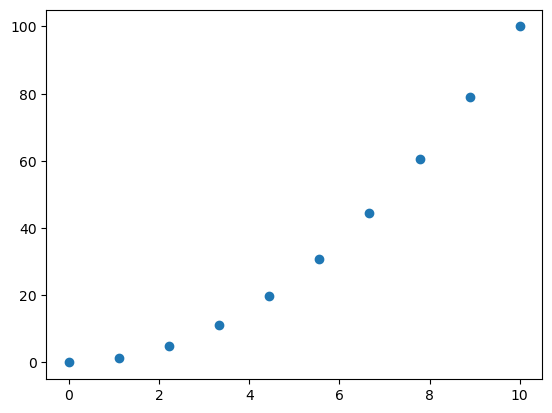

In [4]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

In [6]:
from scipy.interpolate import interp1d

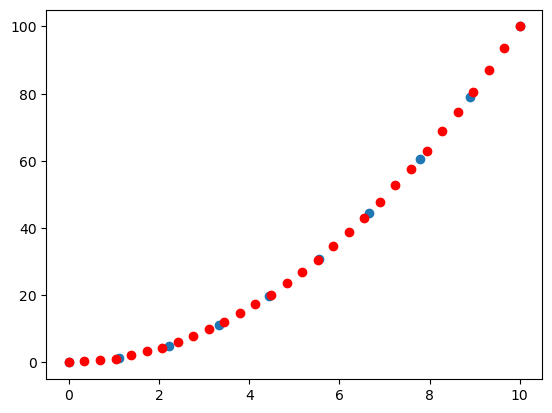

In [8]:
f = interp1d(x,y, kind='linear') # utilisation de la fonction interp1d pour l'interpolation
# linear pour indiquer une interpolation liéaire
# cubic pour indiquer une interpolation cubique 
# interp2d est une fonction qui fonctionne comme interp1d mais en 2d
new_x = np.linspace(0,10,30)
result = f(new_x)
plt.scatter(x,y)
plt.scatter(new_x, result, c='r')

## 2) Optimisation

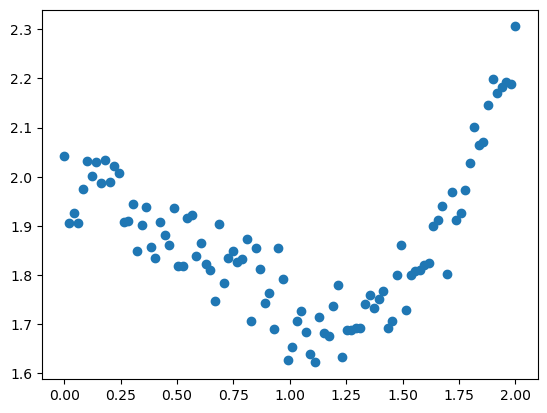

In [10]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [11]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [13]:
from scipy import optimize
params, param_cov = optimize.curve_fit(f, x, y)

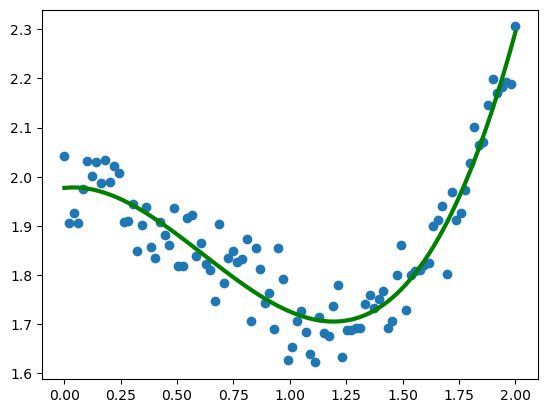

In [17]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c ='g', lw= 3)

## 3) Minimisation

In [18]:
def f (x):
    return x**2 + 15*np.sin(x)

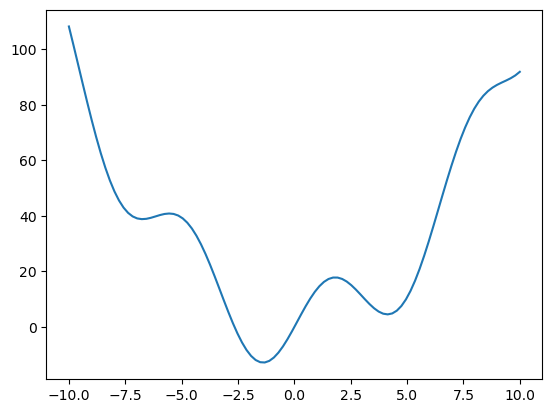

In [19]:
x = np.linspace(-10,10,100)
plt.plot(x, f(x))

In [22]:
x0=-5
result = optimize.minimize(f, x0=x0).x

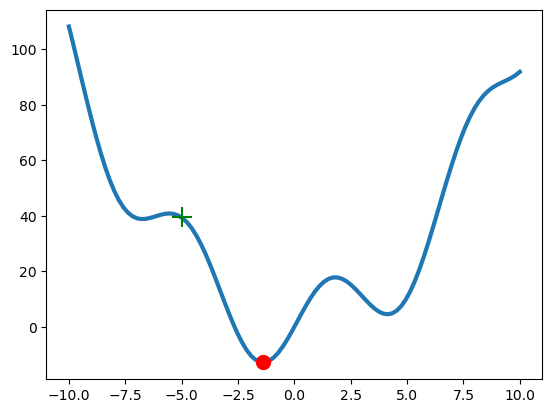

In [23]:
plt.plot(x,f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s = 100, c = 'r', zorder=1)
plt.scatter(x0, f(x0), s = 200, marker='+', c='g', zorder=1)

In [25]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

[-0.78539918 -2.3561934 ]


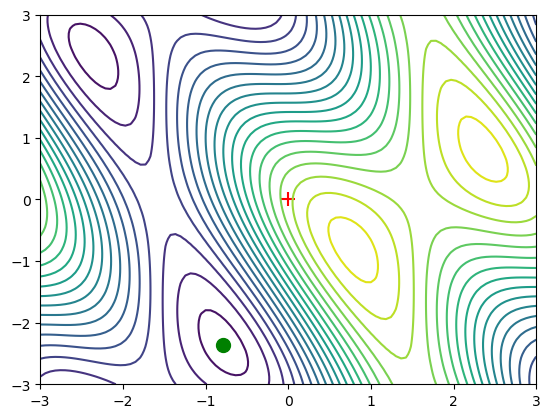

In [32]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
x, y = np.meshgrid(x,y)
plt.contour(x,y,f(np.array([x, y])), 20)

x0 = np.array([0.0, 0.0])
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100)

result = optimize.minimize(f, x0=x0).x
plt.scatter(result[0], result[1], c= 'g', s= 100)
print(result)

## 3) Traitement du signal

In [36]:
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])


In [35]:
from scipy import signal

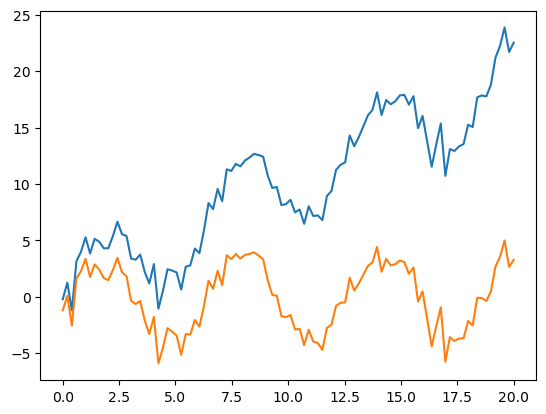

In [38]:
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)

## 4) Transformation de fourier
C'est une technique mathématique qui permet d'extraire et d'analyser les fréquences qui sont présentes dans un signal périodique

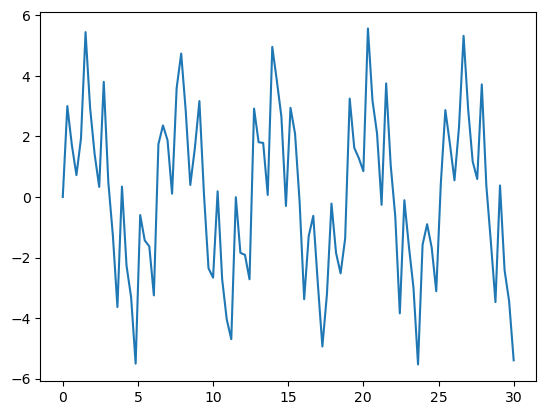

In [39]:
x = np.linspace(0,30,100)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

In [40]:
from scipy import fftpack

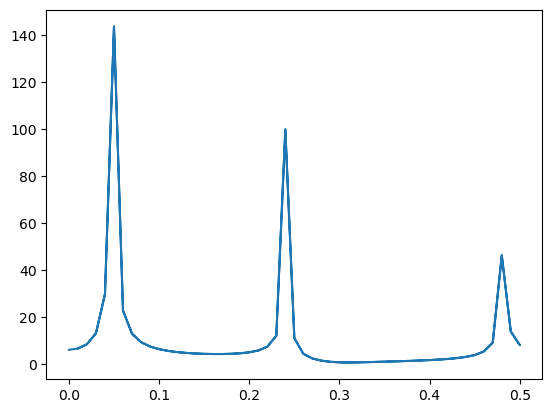

In [41]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

## 5) Traitement d'image
La morphologie est une technique mathématique qui permet transformer des matrices 

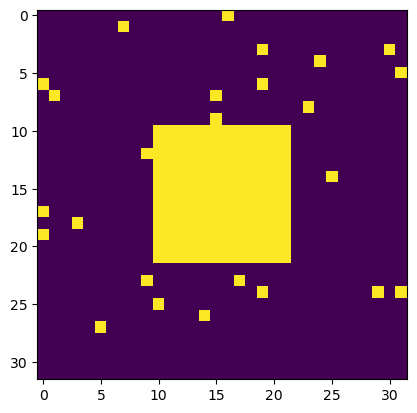

In [42]:
from scipy import ndimage
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10,10:-10] = 1
X[np.random.randint(0,32,30), np.random.randint(0,32,30)] = 1
plt.imshow(X)

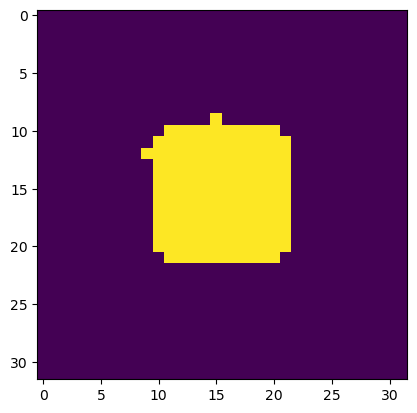

In [44]:
open_x = ndimage.binary_opening(X) # retire les pixels qui sont des artefacts donc une érosion
plt.imshow(open_x)

(507, 537)

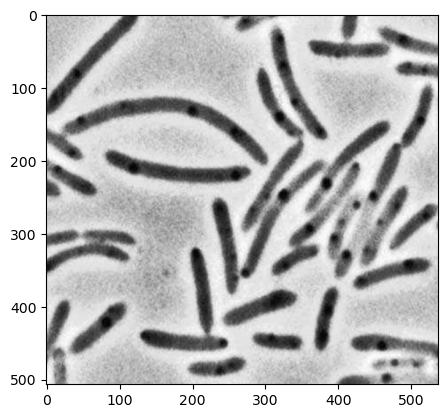

In [68]:
image= plt.imread('bacteria.png')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

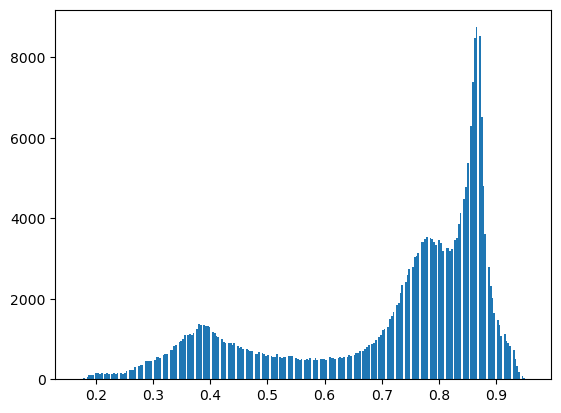

In [69]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

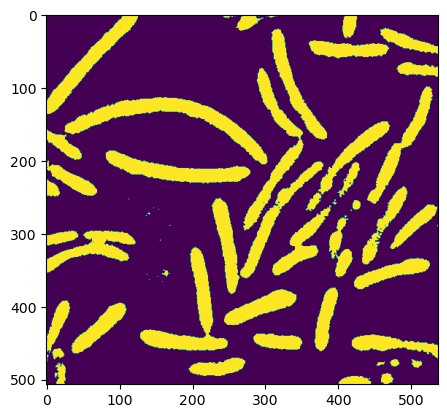

In [70]:
image = image <0.6
plt.imshow(image)

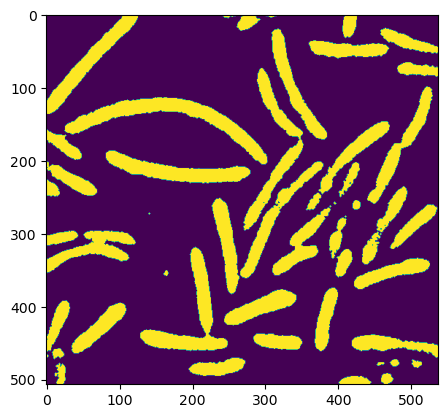

In [71]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [72]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

53


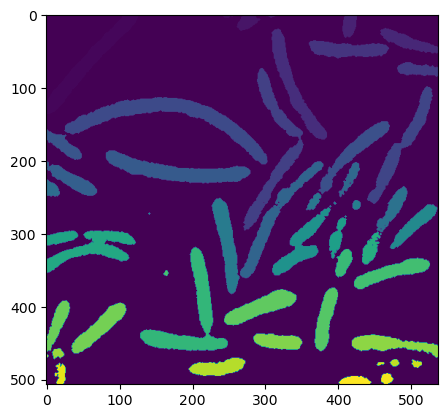

In [73]:
plt.imshow(label_image)

In [76]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

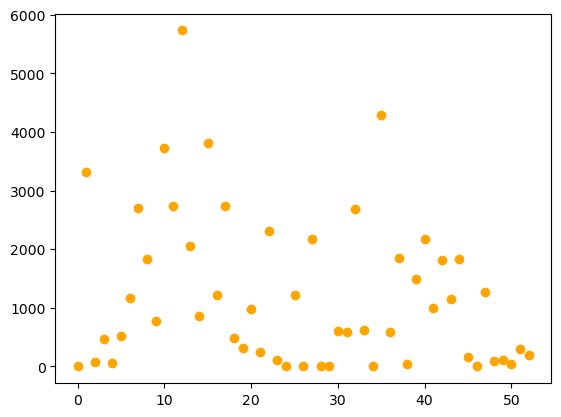

In [77]:
plt.scatter(range(n_labels), sizes, c = 'orange')